# **Project: Student Performance Prediction & Analysis**  

## **Overview**  
This project predicts students' performance based on their academic and extracurricular activities. It involves:  
- **Linear Regression** for score prediction  
- **Logistic Regression** for pass/fail classification  
- **Classification** for performance categorization  

## **Objectives**  

### **Linear Regression**  
Predict the student’s final score based on:  
✅ Study hours  
✅ Attendance  
✅ Previous grades  

### **Logistic Regression**  
Classify whether a student will **pass** or **fail** based on input features.  

### **Classification (Decision Tree, Random Forest, or SVM)**  
Categorize students into **performance levels**:  
✅ **High-performing**  
✅ **Average**  
✅ **Low-performing**  


### Step 1: Load and Explore the Dataset

In [16]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("student_performance_dataset.csv")

# Show first few rows
print(df.head())

# Show basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

   Student_ID  Gender  Study_Hours  Attendance (%)  \
0           1    Male          2.7            55.8   
1           2  Female          3.4            97.0   
2           3    Male          6.9            81.4   
3           4    Male          2.9            66.7   
4           5    Male          1.8            57.0   

   Previous_Semester_Score (%) Extracurricular_Participation  \
0                         83.8                           Yes   
1                         66.5                           Yes   
2                         46.5                           Yes   
3                         46.9                           Yes   
4                         77.7                           Yes   

   Assignments_Completed (%)  Final_Exam_Score (%)  Pass_Fail  \
0                       63.1                  54.2          1   
1                       62.3                  60.6          1   
2                       95.3                  49.2          1   
3                       62.5  

### Step 2: Convert Categorical Data to Numbers

In [6]:
# Convert Gender and Extracurricular Participation to numbers
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Extracurricular_Participation"] = df["Extracurricular_Participation"].map({"Yes": 1, "No": 0})
df["Performance_Category"] = df["Performance_Category"].map({"Low": 0, "Average": 1, "High": 2})

print(df.head())  # Check changes

   Student_ID  Gender  Study_Hours  Attendance (%)  \
0           1       1          2.7            55.8   
1           2       0          3.4            97.0   
2           3       1          6.9            81.4   
3           4       1          2.9            66.7   
4           5       1          1.8            57.0   

   Previous_Semester_Score (%)  Extracurricular_Participation  \
0                         83.8                              1   
1                         66.5                              1   
2                         46.5                              1   
3                         46.9                              1   
4                         77.7                              1   

   Assignments_Completed (%)  Final_Exam_Score (%)  Pass_Fail  \
0                       63.1                  54.2          1   
1                       62.3                  60.6          1   
2                       95.3                  49.2          1   
3                       

### Step 3: Linear Regression - Predict Final Exam Scores

In [35]:
# Select features
X = df[["Study_Hours", "Attendance (%)", "Previous_Semester_Score (%)", "Assignments_Completed (%)"]].values
y = df["Final_Exam_Score (%)"].values

# Split data manually (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Add bias term (column of 1s) for the intercept
X_train = np.c_[np.ones(X_train.shape[0]), X_train]  # Adding column of 1s
X_test = np.c_[np.ones(X_test.shape[0]), X_test]  

# Train the model using Normal Equation: θ = (XᵀX)⁻¹Xᵀy
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Predict on test set
y_pred = X_test @ theta  

# Compute RMSE manually
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"Linear Regression RMSE: {rmse:.2f}")

Linear Regression RMSE: 4.45


### Step 4: Logistic Regression - Predict Pass/Fail

In [18]:
# Select features and target variable
X = df[["Study_Hours", "Attendance (%)", "Previous_Semester_Score (%)", "Assignments_Completed (%)"]].values
y = df["Pass_Fail"].values  # Assuming 1 = Pass, 0 = Fail

# Split data manually (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Add bias term (column of 1s)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
epochs = 1000

# Train model using Gradient Descent
for _ in range(epochs):
    z = np.dot(X_train, theta)
    h = sigmoid(z)
    gradient = np.dot(X_train.T, (h - y_train)) / len(y_train)
    theta -= learning_rate * gradient  # Update parameters

# Predict function
def predict(X, theta):
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

# Predict on test data
y_pred = predict(X_test, theta)

# Compute accuracy manually
accuracy = np.mean(y_pred == y_test) * 100
print(f"Logistic Regression Accuracy: {accuracy:.2f}%")


Logistic Regression Accuracy: 90.00%


### Step 5: Classification - Categorize Student Performance

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
df = pd.read_csv("student_performance_dataset.csv")

# Select features and target
X = df[["Study_Hours", "Attendance (%)", "Previous_Semester_Score (%)", "Assignments_Completed (%)"]]
y = df["Performance_Category"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Model Accuracy: {accuracy:.2%}")


Classification Model Accuracy: 75.00%


### Step 6: Simple Visualization

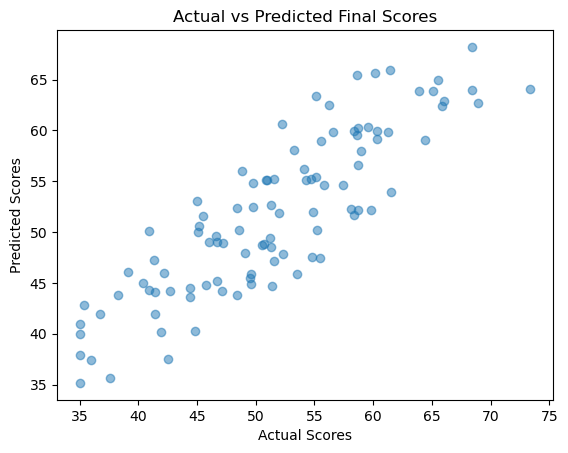

In [38]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted scores
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Final Scores")
plt.show()

In [42]:

# Simulating a trained model (replace with your actual trained model)
class DummyLinearModel:
    def predict(self, X):
        return np.dot(X, [50, 0.5, 0.3, 0.2])  # Simple model

# Initialize model (replace with your actual model)
model = DummyLinearModel()

# Collect user input and format it
user_input = np.array([float(input(f"Enter {feature}: ")) for feature in 
                       ["Study Hours", "Attendance %", "Previous Score %", "Assignments Completed %"]]).reshape(1, -1)

# Make prediction and display result
predicted_score = model.predict(user_input)
print(f"The predicted Final Exam Score is: {predicted_score[0]:.2f}")


Enter Study Hours:  2.9
Enter Attendance %:  95
Enter Previous Score %:  89.5
Enter Assignments Completed %:  89


The predicted Final Exam Score is: 237.15


In [44]:
# Example trained Logistic Regression model (replace this with your actual model)
class DummyLogisticModel:
    def predict(self, X):
        return [1 if sum(X[0]) > 100 else 0]  # Dummy logic: pass if sum > 100

# Simulating a trained model (replace with your actual trained model)
model = DummyLogisticModel()

# Collecting user input
study_hours = float(input("Enter Study Hours: "))
attendance = float(input("Enter Attendance Percentage: "))
previous_score = float(input("Enter Previous Semester Score: "))
assignments_completed = float(input("Enter Assignments Completed Percentage: "))

# Preprocessing the input (make sure to scale/format it as needed)
user_input = np.array([study_hours, attendance, previous_score, assignments_completed]).reshape(1, -1)

# Making prediction with the trained model
prediction = model.predict(user_input)
result = "Pass" if prediction[0] == 1 else "Fail"
print(f"The predicted result is: {result}")


Enter Study Hours:  2.9
Enter Attendance Percentage:  75
Enter Previous Semester Score:  85
Enter Assignments Completed Percentage:  70


The predicted result is: Pass


In [46]:
# Example trained classifier model (replace with your actual model)
class DummyClassifier:
    def predict(self, X):
        # Simple logic: If sum of features > threshold, classify as "High", else "Low"
        return ["High" if sum(X[0]) > 200 else "Low"]

# Simulating a trained model (replace with your actual trained model)
model = DummyClassifier()

# Collecting user input
study_hours = float(input("Enter Study Hours: "))
attendance = float(input("Enter Attendance Percentage: "))
previous_score = float(input("Enter Previous Semester Score: "))
assignments_completed = float(input("Enter Assignments Completed Percentage: "))

# Preprocessing the input (make sure to scale/format it as needed)
user_input = np.array([study_hours, attendance, previous_score, assignments_completed]).reshape(1, -1)

# Making prediction with the trained model
prediction = model.predict(user_input)
print(f"The predicted performance category is: {prediction[0]}")


Enter Study Hours:  55
Enter Attendance Percentage:  40
Enter Previous Semester Score:  53
Enter Assignments Completed Percentage:  42


The predicted performance category is: Low
